To install the package, you have to use pip (It's not available on Conda).

To do that in a conda environment, run
```
conda activate <env_name>
```
then
```
python -m pip install tnetwork
```
`pythom -m` just makes sure it installs to the active conda environment.

I tested it on Python 3.12.4 and it worked. If it doesn't for you, once the environment is active, run `conda update --all` to update all your installed packages and python.

In [1]:
import matplotlib.pyplot as plt
import tnetwork as tn
import networkx as nx
import pickle

MIN_YEAR = 1920
MAX_YEAR = 2021

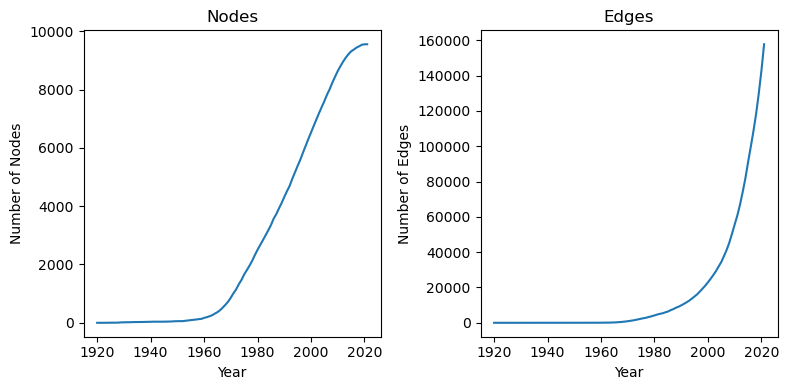

In [2]:
# get the initial graph (Replace with however you want to read the network)
with open("/Users/francesmcconnell/Desktop/Comp 127/2024SummerTopo/Frances/applied_math_grb_64hr_12pr.pickle", 'rb') as file:
    p = pickle.load(file)
    G = p['graph']
    reps = p['optimized']["optimal cycle nodes"].dropna()

# function to get g at a given year
def G_at(y):
    G_y = nx.Graph()
    G_y.add_nodes_from([(n, d) for n, d in G.nodes(data=True) if d['year'] < y])
    G_y.add_edges_from([(u, v, d) for u, v, d in G.edges(data=True) if d['year'] < y])
    return G_y

# snapshots (G at each year)
G_snapshots = [G_at(y) for y in range(MIN_YEAR, MAX_YEAR+1)]

# plot formating
fig, ax = plt.subplots(1, 2)
fig.set_figwidth(8)
fig.set_figheight(4)
ax[0].set_title('Nodes')
ax[1].set_title('Edges')
ax[0].set_xlabel('Year')
ax[1].set_xlabel('Year')
ax[0].set_ylabel('Number of Nodes')
ax[1].set_ylabel('Number of Edges')

# plot graph attributes
ax[0].plot(range(MIN_YEAR, MAX_YEAR+1), [len(g.nodes) for g in G_snapshots])
ax[1].plot(range(MIN_YEAR, MAX_YEAR+1), [len(g.edges) for g in G_snapshots])

# finalize it
fig.tight_layout()

In [3]:
# make dynamic graph of G
G_over_t = tn.DynGraphSN(G_snapshots)
G_over_t

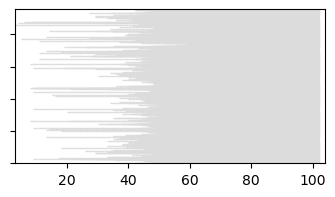

In [4]:
plot = tn.plot_longitudinal(G_over_t,width=400,height=200)

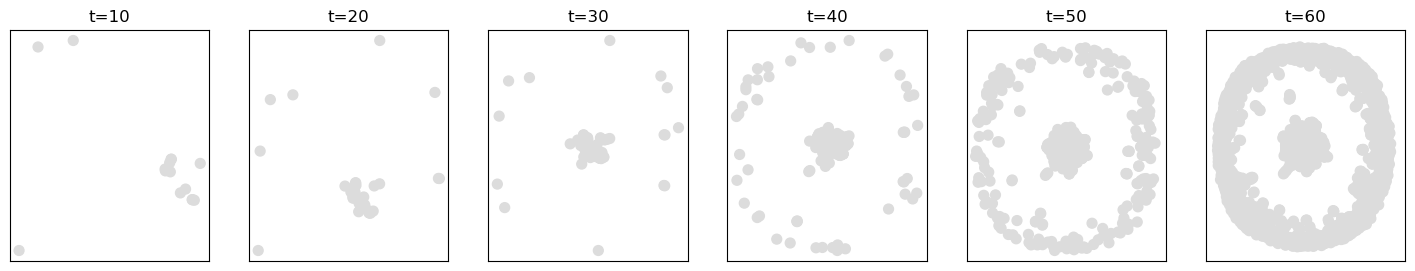

In [5]:
plot = tn.plot_as_graph(G_over_t,ts=[10,20,30,40,50,60],width=300,height=300)

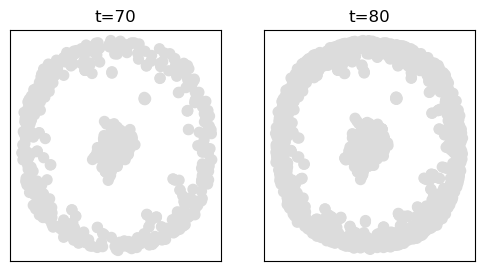

In [6]:
plot = tn.plot_as_graph(G_over_t,ts=[70, 80],width=300,height=300)

In [7]:
plot = tn.plot_as_graph(G_over_t,ts=[90, 100],width=300,height=300)

KeyboardInterrupt: 

In [39]:
## community detection
coms = tn.DCD.smoothed_louvain(G_over_t, 1)

# plot formating
fig, ax = plt.subplots(1, 2)
fig.set_figwidth(8)
fig.set_figheight(4)
ax[0].set_title('Communities')
ax[1].set_title('Nodes Per Community')
ax[0].set_xlabel('Year')
ax[1].set_xlabel('Year')
ax[0].set_ylabel('Number of Communities')
ax[1].set_ylabel('Avg. Nodes Per Community')

# plot graph attributes
ax[0].plot(range(MIN_YEAR, MAX_YEAR+1), [len(coms.communities(t)) for t in range(MAX_YEAR+1-MIN_YEAR)])
ax[1].plot(range(MIN_YEAR, MAX_YEAR+1), [0 if len(coms.communities(t)) == 0 else sum([len(c) for c in coms.communities(t).values()]) / len(coms.communities(t)) for t in range(MAX_YEAR+1-MIN_YEAR)])

# finalize it
fig.tight_layout()

  0% (0 of 102) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--


starting smoothed_louvain


 18% (19 of 102) |####                   | Elapsed Time: 0:00:00 ETA:   0:00:00
 36% (37 of 102) |########               | Elapsed Time: 0:00:00 ETA:   0:00:00
 49% (50 of 102) |###########            | Elapsed Time: 0:00:00 ETA:   0:00:00
 54% (56 of 102) |############           | Elapsed Time: 0:00:00 ETA:   0:00:00
 58% (60 of 102) |#############          | Elapsed Time: 0:00:00 ETA:   0:00:00
 62% (64 of 102) |##############         | Elapsed Time: 0:00:00 ETA:   0:00:00
 64% (66 of 102) |##############         | Elapsed Time: 0:00:00 ETA:   0:00:00
 66% (68 of 102) |###############        | Elapsed Time: 0:00:00 ETA:   0:00:00
 68% (70 of 102) |###############        | Elapsed Time: 0:00:00 ETA:   0:00:00
 70% (72 of 102) |################       | Elapsed Time: 0:00:00 ETA:   0:00:00
 72% (74 of 102) |################       | Elapsed Time: 0:00:00 ETA:   0:00:00
 73% (75 of 102) |################       | Elapsed Time: 0:00:00 ETA:   0:00:00
 75% (77 of 102) |#################     

TypeError: 'int' object is not callable

Note: to be able to use all crisp methods, you need to install some additional packages:  {'graph_tool', 'infomap', 'leidenalg', 'bayanpy'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'ASLPAw', 'pyclustering'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'infomap', 'leidenalg'}


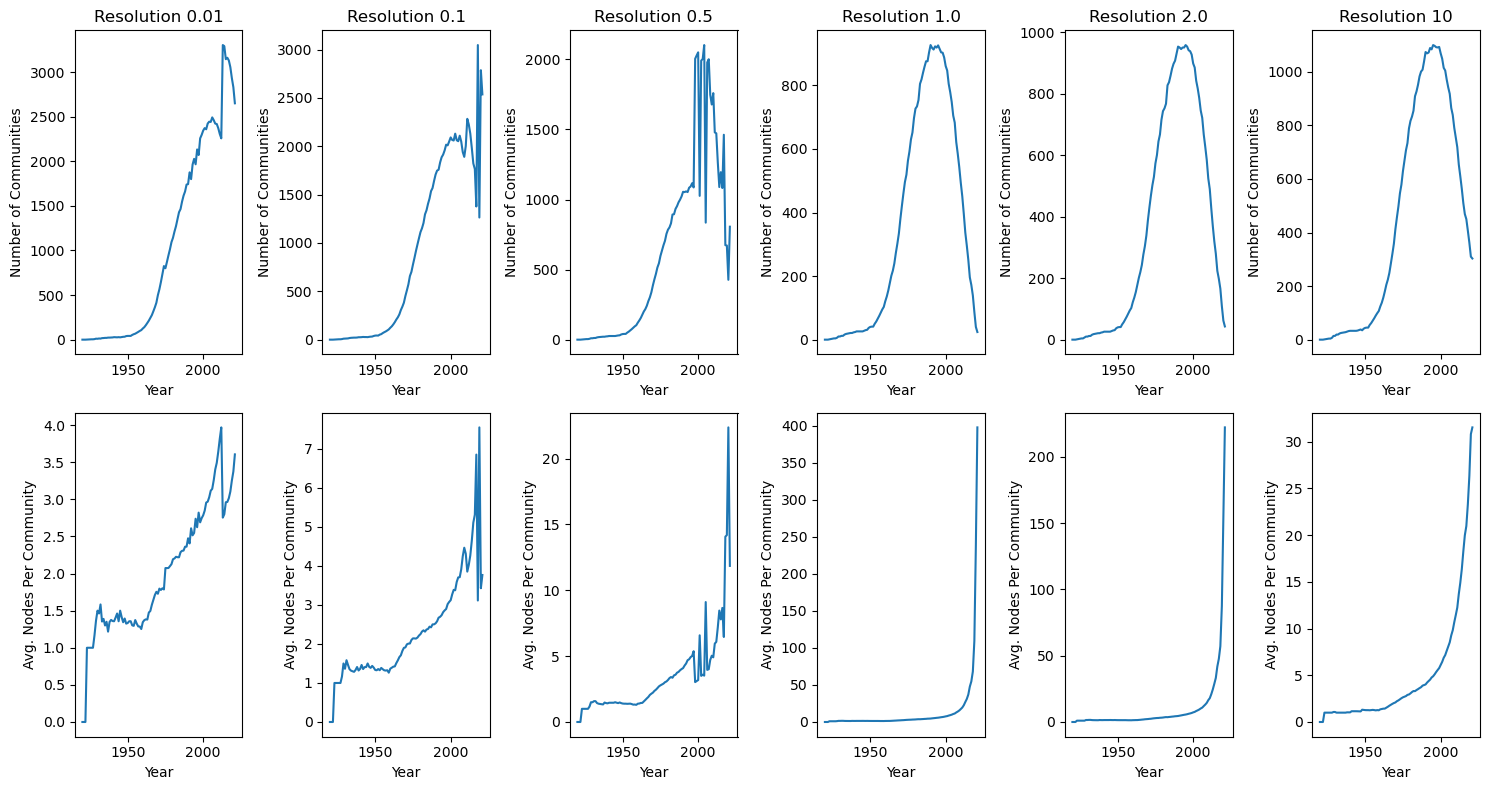

In [8]:
from cdlib import algorithms

resolutions = [0.01, .1, 0.5, 1.0, 2.0, 10]

fig, ax = plt.subplots(2, len(resolutions), figsize=(15, 8))

for i, res in enumerate(resolutions):
    coms = []
    for g in G_snapshots:
        if len(g.nodes) > 0:  # Ensure the graph has nodes
            coms.append(algorithms.louvain(g, weight='weight', resolution=res))
        else:
            coms.append(None)
    
    num_communities = [len(com.communities) if com else 0 for com in coms]
    avg_nodes_per_community = [
        0 if not com or len(com.communities) == 0 else sum(len(c) for c in com.communities) / len(com.communities) 
        for com in coms
    ]
    
    ax[0, i].set_title(f'Resolution {res}')
    ax[0, i].set_xlabel('Year')
    ax[0, i].set_ylabel('Number of Communities')
    ax[0, i].plot(range(MIN_YEAR, MAX_YEAR + 1), num_communities)
    
    ax[1, i].set_xlabel('Year')
    ax[1, i].set_ylabel('Avg. Nodes Per Community')
    ax[1, i].plot(range(MIN_YEAR, MAX_YEAR + 1), avg_nodes_per_community)

fig.tight_layout()
plt.show()

Resolution 0.01:
Number of communities over time: [0, 0, 0, 1, 2, 3, 4, 4, 6, 10, 10, 13, 13, 17, 18, 20, 22, 23, 22, 24, 25, 27, 29, 27, 28, 28, 29, 32, 33, 39, 42, 43, 43, 53, 62, 69, 78, 87, 99, 108, 126, 139, 158, 186, 213, 235, 273, 325, 364, 423, 495, 569, 648, 736, 731, 807, 871, 949, 1014, 1093, 1154, 1194, 1273, 1357, 1414, 1477, 1531, 1615, 1648, 1732, 1811, 1847, 1782, 1994, 1924, 2095, 2135, 2062, 2071, 2114, 2303, 2197, 2375, 2432, 2461, 2421, 3238, 2451, 2425, 3323, 2351, 2353, 2243, 2126, 2091, 3228, 3175, 3150, 3076, 2925, 2796, 2616]
Average nodes per community over time: [0, 0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.1666666666666667, 1.5, 1.5, 1.4615384615384615, 1.4615384615384615, 1.3529411764705883, 1.3888888888888888, 1.3, 1.2272727272727273, 1.2173913043478262, 1.4090909090909092, 1.375, 1.36, 1.4074074074074074, 1.3103448275862069, 1.4074074074074074, 1.3571428571428572, 1.3928571428571428, 1.4137931034482758, 1.34375, 1.393939393939394, 1.358974358974359, 1.333333333333

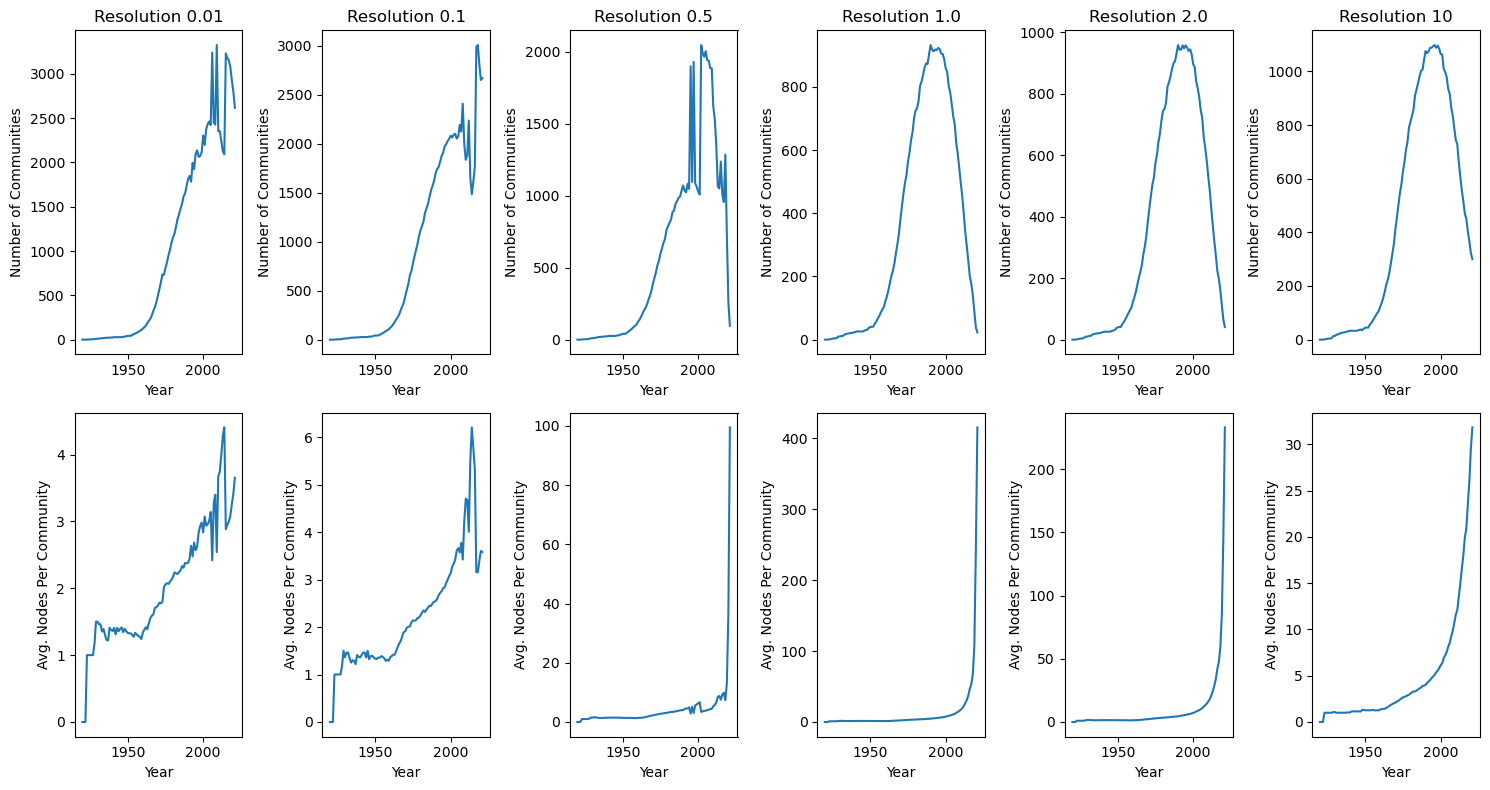

In [9]:
fig, ax = plt.subplots(2, len(resolutions), figsize=(15, 8))

for i, res in enumerate(resolutions):
    coms = []
    for g in G_snapshots:
        if len(g.nodes) > 0:  # Ensure the graph has nodes
            coms.append(algorithms.louvain(g, resolution=res))
        else:
            coms.append(None)
    
    num_communities = [len(com.communities) if com else 0 for com in coms]
    avg_nodes_per_community = [
        0 if not com or len(com.communities) == 0 else sum(len(c) for c in com.communities) / len(com.communities) 
        for com in coms
    ]
    
    print(f"Resolution {res}:")
    print("Number of communities over time:", num_communities)
    print("Average nodes per community over time:", avg_nodes_per_community)
    
    ax[0, i].set_title(f'Resolution {res}')
    ax[0, i].set_xlabel('Year')
    ax[0, i].set_ylabel('Number of Communities')
    ax[0, i].plot(range(MIN_YEAR, MAX_YEAR + 1), num_communities)
    
    ax[1, i].set_xlabel('Year')
    ax[1, i].set_ylabel('Avg. Nodes Per Community')
    ax[1, i].plot(range(MIN_YEAR, MAX_YEAR + 1), avg_nodes_per_community)

fig.tight_layout()
plt.show()


In [10]:
dynamic_coms = algorithms.louvain(G_snapshots[-1], resolution=2.35505)

In [11]:
static_coms=[]
with open('static_coms.txt', 'r') as f:
    for line in f:
        com_line = set()
        for item in line.split(", "):
            if item != "\n":
                com_line.add(item)
        static_coms.append(com_line)

In [12]:
len(static_coms)

52

In [13]:
len(dynamic_coms.communities)

52

In [14]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

def flatten_communities(communities):
    node_to_community = {}
    for i, community in enumerate(communities):
        for node in community:
            node_to_community[node] = i
    return [node_to_community[node] for node in G.nodes()]

flattened_dc = flatten_communities(dynamic_coms.communities)
flattened_sc = flatten_communities(static_coms)

ari = adjusted_rand_score(flattened_dc, flattened_sc)  # compare communities pairwise
nmi = normalized_mutual_info_score(flattened_dc, flattened_sc)

print(f"ARI: {ari}\nNMI: {nmi}")

ARI: 0.6413756706197121
NMI: 0.664534057808424


### Analysis

The ARI and NMI of the static communities compared to the dynamic analysis are similar to the ARI and NMI of the static communities compared to different iterations of themselves. Thus, the dynamic communities are comprable to the static communities in the year 2022. 

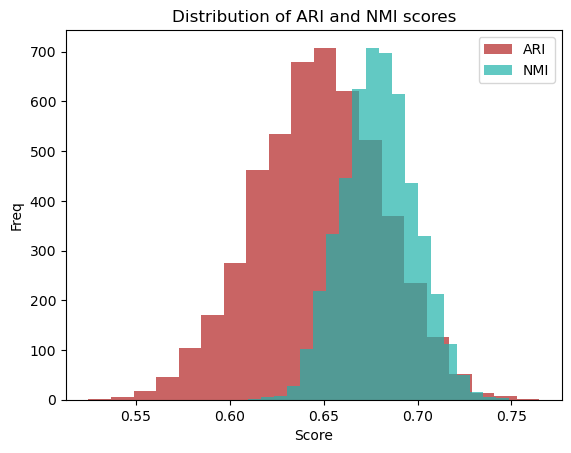

In [15]:
big_rep_cycle_list1 = []
for thing in reps:
    big_rep_cycle_list1.append(list(thing))

In [16]:
all_dynamic_communities = []
snaps = []
for snap in G_snapshots:
    try:
        all_dynamic_communities.append(algorithms.louvain(snap, resolution=2.35505).communities)
        snaps.append(snap)
    except:
        all_dynamic_communities.append([])
        snaps.append("NOTHING")

In [17]:
def prep_data(dyncom_index = 50):
    coms = all_dynamic_communities[dyncom_index]
    snap_graph = snaps[dyncom_index]

    if snaps=="NOTHING":
        return False

    filtered_big_reps = []
    for cycle in big_rep_cycle_list1:
        present = True
        for nodething in cycle:
            if nodething not in snap_graph.nodes():
                present = False
        if present:
            filtered_big_reps.append(cycle)

    node_to_com_dict = {}
    for i, community in enumerate(coms):  # create a dictionary of {node : community the node is in}
        for node in community:
            node_to_com_dict[node] = i
    return node_to_com_dict, filtered_big_reps, snap_graph, coms

In [18]:
## Code for 3d plot

import numpy as np
import plotly.graph_objs as go

def make_graph(node_to_com_dict, filtered_big_reps, snap_graph, coms):
    collapsed_G = nx.Graph()

    for i in range(len(coms)):
        collapsed_G.add_node(i)

    hole_adjacent_edge_count = {}
    total_edge_count = {}

    original_cycle_edges = set()
    for cycle in filtered_big_reps:
        for i in range(len(cycle)):
            u, v = cycle[i], cycle[(i + 1) % len(cycle)]
            original_cycle_edges.add((u, v))
            original_cycle_edges.add((v, u))

    for u, v in snap_graph.edges():
        community_u = node_to_com_dict[u]
        community_v = node_to_com_dict[v]
        if community_u != community_v:
            if collapsed_G.has_edge(community_u, community_v):
                collapsed_G[community_u][community_v]['weight'] += 1
            else:
                collapsed_G.add_edge(community_u, community_v, weight=1)
            
            if (community_u, community_v) not in total_edge_count:
                total_edge_count[(community_u, community_v)] = 0
                hole_adjacent_edge_count[(community_u, community_v)] = 0
            
            total_edge_count[(community_u, community_v)] += 1
            
            if (u, v) in original_cycle_edges or (v, u) in original_cycle_edges:
                hole_adjacent_edge_count[(community_u, community_v)] += 1

    edge_proportions = {edge: hole_adjacent_edge_count[edge] / total_edge_count[edge] for edge in total_edge_count}

    pos = {i: (np.random.random(), np.random.random(), np.random.random()) for i in collapsed_G.nodes}

    edge_trace = []
    for edge in collapsed_G.edges():
        x0, y0, z0 = pos[edge[0]]
        x1, y1, z1 = pos[edge[1]]
        proportion = edge_proportions.get(edge, 0)
        color = f'rgb({int(255 * (1 - proportion))}, 0, {int(255 * proportion)})'
        
        edge_trace.append(go.Scatter3d(
            x=[x0, x1, None],
            y=[y0, y1, None],
            z=[z0, z1, None],
            line=dict(width=5, color=color),
            hoverinfo='none',
            mode='lines'
        ))

    # map original cycle edges to community edges
    collapsed_cycle_edges = set()
    for u, v in original_cycle_edges:
        community_u = node_to_com_dict[u]
        community_v = node_to_com_dict[v]
        if community_u != community_v:
            collapsed_cycle_edges.add((community_u, community_v))
            collapsed_cycle_edges.add((community_v, community_u))

    # count edges part of any cycle and not part of any cycle
    cycle_edge_count = len([e for e in collapsed_G.edges() if (e in collapsed_cycle_edges or (e[1], e[0]) in collapsed_cycle_edges)])
    non_cycle_edge_count = len(collapsed_G.edges()) - cycle_edge_count

    # calculate percentages for gradient
    total_edges = len(collapsed_G.edges())
    percent_non_cycle = (non_cycle_edge_count / total_edges) * 100
    percent_cycle = (cycle_edge_count / total_edges) * 100

    print(f"Number of edges not part of any cycle: {non_cycle_edge_count} ({percent_non_cycle:.2f}%)")
    print(f"Number of edges part of a cycle: {cycle_edge_count} ({percent_cycle:.2f}%)")

    node_trace = go.Scatter3d(
        x=[pos[node][0] for node in collapsed_G.nodes()],
        y=[pos[node][1] for node in collapsed_G.nodes()],
        z=[pos[node][2] for node in collapsed_G.nodes()],
        mode='markers',
        marker=dict(
            size=7,
            color='black',
        ),
        text=list(collapsed_G.nodes()),
        hoverinfo='text'
    )

    # do color bar/key
    color_bar_trace = go.Scatter3d(
        x=[None], y=[None], z=[None],
        mode='markers',
        marker=dict(
            size=0,
            color=[0, 1], 
            colorscale=[[0, 'rgb(255, 0, 0)'], [1, 'rgb(0, 0, 255)']],
            colorbar=dict(
                title="Proportion of Hole-Adjacent Edges",
                tickvals=[0, 1],
                ticktext=["0% (Red)", "100% (Blue)"]
            )
        ),
        hoverinfo='none'
    )

    layout = go.Layout(
        width=1200,
        height=1000,
        showlegend=False,
        scene=dict(
            xaxis=dict(showbackground=False),
            yaxis=dict(showbackground=False),
            zaxis=dict(showbackground=False)
        ),
    )

    fig = go.Figure(data=edge_trace + [node_trace, color_bar_trace], layout=layout)
    fig.show()

In [27]:
import numpy as np
import plotly.graph_objs as go

def make_graph_2d(node_to_com_dict, filtered_big_reps, snap_graph, coms):
    collapsed_G = nx.Graph()

    for i in range(len(coms)):
        collapsed_G.add_node(i)

    hole_adjacent_edge_count = {}
    total_edge_count = {}

    original_cycle_edges = set()
    for cycle in filtered_big_reps:
        for i in range(len(cycle)):
            u, v = cycle[i], cycle[(i + 1) % len(cycle)]
            original_cycle_edges.add((u, v))
            original_cycle_edges.add((v, u))

    for u, v in snap_graph.edges():
        community_u = node_to_com_dict[u]
        community_v = node_to_com_dict[v]
        if community_u != community_v:
            if collapsed_G.has_edge(community_u, community_v):
                collapsed_G[community_u][community_v]['weight'] += 1
            else:
                collapsed_G.add_edge(community_u, community_v, weight=1)
            
            if (community_u, community_v) not in total_edge_count:
                total_edge_count[(community_u, community_v)] = 0
                hole_adjacent_edge_count[(community_u, community_v)] = 0
            
            total_edge_count[(community_u, community_v)] += 1
            
            if (u, v) in original_cycle_edges or (v, u) in original_cycle_edges:
                hole_adjacent_edge_count[(community_u, community_v)] += 1

    edge_proportions = {edge: hole_adjacent_edge_count[edge] / total_edge_count[edge] for edge in total_edge_count}

    pos = {i: (np.random.random(), np.random.random()) for i in collapsed_G.nodes}

    edge_trace = []
    for edge in collapsed_G.edges():
        x0, y0 = pos[edge[0]]
        x1, y1 = pos[edge[1]]
        proportion = edge_proportions.get(edge, 0)
        color = f'rgb({int(255 * (1 - proportion))}, 0, {int(255 * proportion)})'
        
        edge_trace.append(go.Scatter(
            x=[x0, x1, None],
            y=[y0, y1, None],
            line=dict(width=5, color=color),
            hoverinfo='none',
            mode='lines'
        ))

    # map original cycle edges to community edges
    collapsed_cycle_edges = set()
    for u, v in original_cycle_edges:
        community_u = node_to_com_dict[u]
        community_v = node_to_com_dict[v]
        if community_u != community_v:
            collapsed_cycle_edges.add((community_u, community_v))
            collapsed_cycle_edges.add((community_v, community_u))

    # count edges part of any cycle and not part of any cycle
    cycle_edge_count = len([e for e in collapsed_G.edges() if (e in collapsed_cycle_edges or (e[1], e[0]) in collapsed_cycle_edges)])
    non_cycle_edge_count = len(collapsed_G.edges()) - cycle_edge_count

    # calculate percentages for gradient
    total_edges = len(collapsed_G.edges())
    percent_non_cycle = (non_cycle_edge_count / total_edges) * 100
    percent_cycle = (cycle_edge_count / total_edges) * 100

    print(f"Number of edges not part of any cycle: {non_cycle_edge_count} ({percent_non_cycle:.2f}%)")
    print(f"Number of edges part of a cycle: {cycle_edge_count} ({percent_cycle:.2f}%)")

    node_trace = go.Scatter(
        x=[pos[node][0] for node in collapsed_G.nodes()],
        y=[pos[node][1] for node in collapsed_G.nodes()],
        mode='markers',
        marker=dict(
            size=7,
            color='black',
        ),
        text=list(collapsed_G.nodes()),
        hoverinfo='text'
    )

    # do color bar/key
    color_bar_trace = go.Scatter(
        x=[None], y=[None],
        mode='markers',
        marker=dict(
            size=0,
            color=[0, 1], 
            colorscale=[[0, 'rgb(255, 0, 0)'], [1, 'rgb(0, 0, 255)']],
            colorbar=dict(
                title="Proportion of Hole-Adjacent Edges",
                tickvals=[0, 1],
                ticktext=["0% (Red)", "100% (Blue)"]
            )
        ),
        hoverinfo='none'
    )

    layout = go.Layout(
        width=1200,
        height=1000,
        showlegend=False,
        xaxis=dict(showbackground=False),
        yaxis=dict(showbackground=False),
    )

    fig = go.Figure(data=edge_trace + [node_trace, color_bar_trace], layout=layout)
    fig.show()


In [28]:
import ipywidgets as widgets
from IPython.display import display, clear_output

def display_graph(index):
    try:
        clear_output(wait=True)
        node_to_com_dict, filtered_big_reps, snap_graph, coms = prep_data(index-1920)
        make_graph(node_to_com_dict, filtered_big_reps, snap_graph, coms)
    except:
        print("Try alternative index.")

index_slider = widgets.IntSlider(min=1920, max=2022, step=1, description="Year:")
widgets.interact(display_graph, index=index_slider)
display(index_slider)


interactive(children=(IntSlider(value=1920, description='Year:', max=2022, min=1920), Output()), _dom_classes=…

IntSlider(value=1920, description='Year:', max=2022, min=1920)

In [53]:
sc = [0 if not com or len(com.communities) == 0 else sum(len(c) for c in com.communities) / len(com.communities) 
        for com in coms]
sc

TypeError: 'NodeClustering' object is not iterable

In [72]:
if coms[101]:
    specific_communities = coms[101].communities
    print(f"Communities: {specific_communities}")
else:
    print(f"No communities found.")

Communities: [['approximate genetic correlation', 'bos taurus autosome bta 6', 'bos taurus autosome', 'comparison of sheep', 'dutch holstein friesian cow', 'european taurine', 'golgi apparatus', 'holstein cattle', 'acetyl coa carboxylase 1', 'acyltransferase 2 gene', 'additive genetic effect', 'alpaca population', 'beta kappa', 'beta lactoglobulin locus', 'cell cell adhesion', 'chain fatty acid', 'chromosomal region', 'conservation management purpose', 'control region', 'cow efficiency', 'cow productivity', 'dairy cattle breed', 'dairy trait', 'direct additive heritability', 'dominance genetic effect', 'dominance genetic variance', 'efficient ruminal fermentation', 'fatty acid profile', 'fatty acid synthesis', 'fatty acid bind protein 3', 'gene diversity', 'genetic analysis', 'genetic bottleneck hypothesis', 'genetic effect', 'genetic study', 'half sib family', 'kappa cn genotype', 'large stock unit', 'mammalian tissues', 'medium chain fatty acid', 'membrane fraction', 'microsatellite 

In [83]:
recent_coms = []
resolutions_l = []
g = G_snapshots[-1]
for res_test in range(8,15,2):
    recent_coms.append(len((algorithms.louvain(g, weight='weight', resolution=res_test/10)).communities))
    resolutions_l.append(res_test/10)
print(recent_coms)
print(resolutions_l)

[986, 982, 991, 997]
[0.8, 1.0, 1.2, 1.4]


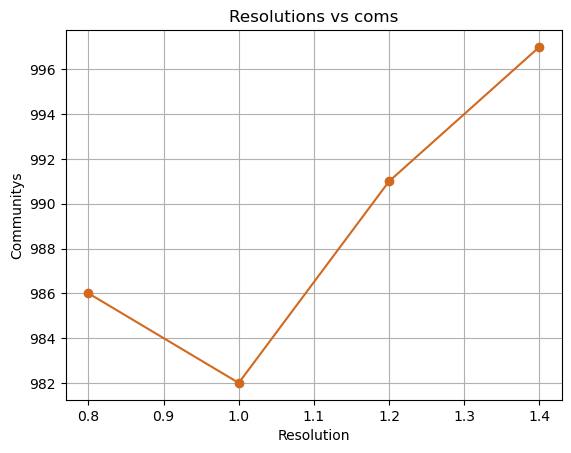

In [84]:
plt.plot(resolutions_l, recent_coms, marker='o', color = "chocolate")
plt.xlabel('Resolution')
plt.ylabel('Communitys')
plt.title('Resolutions vs coms')
plt.grid(True)
plt.show()

In [60]:
print(len(specific_communities))

1018


In [35]:
print(len(coms.communities(101).keys()))

973


In [11]:
## To get the community affiliations at a certain time period (Node: Community dict):
coms.affiliations(100)

{'equine assist intervention': {'41957'},
 'animal assisted interventions': {'41957'},
 'autism spectrum disorder': {'41957'},
 'spectrum disorder': {'41957'},
 'image acquisition platform': {'42015'},
 'data augmentation method': {'42015'},
 'neural network algorithm': {'42015'},
 'network algorithm': {'42015'},
 'convolutional neural network algorithm': {'42015'},
 'pascal voc dataset': {'42015'},
 'fast rcnn model': {'42015'},
 'detailed feature extraction': {'42015'},
 'janus kinase / signal transducer': {'42048'},
 'kinase / signal transducer': {'42048'},
 'spring summer period': {'42052'},
 'regional veterinary laboratory': {'42052'},
 'kurgan region': {'42052'},
 'epizootic situation': {'42052'},
 'mel frequency cepstral coefficient': {'42070'},
 'yunling cattle': {'42118'},
 'anti inflammatory effect': {'42176'},
 'antibiotic residue': {'42178'},
 'usage of antibiotic': {'42178'},
 'machine learning approach': {'42190'},
 'machine learn': {'42190'},
 'artificial intelligence': 

In [12]:
## To get the communities at all time periods (Community: {Node: Times Node is a Part of the Community} dict):
coms.communities()

{'1': {'agricultural research council': [18,
   19,
   20,
   21,
   22,
   23,
   24,
   25,
   26,
   27,
   28,
   29,
   30,
   31,
   32,
   33,
   34,
   35,
   36,
   37,
   38,
   39,
   40,
   41,
   42,
   43,
   44,
   45,
   46,
   47,
   48,
   49,
   50,
   51,
   52,
   53,
   54,
   55,
   56,
   57,
   58,
   59],
  'field station': [18,
   19,
   20,
   21,
   22,
   23,
   24,
   25,
   26,
   27,
   28,
   29,
   30,
   31,
   32,
   33,
   34,
   35,
   36,
   37,
   38,
   39,
   40,
   41,
   42,
   43,
   44,
   45,
   46,
   47,
   48,
   49,
   50,
   51,
   52,
   53,
   54,
   55,
   56,
   57,
   58,
   59]},
 '2': {'korean cattle': [18,
   19,
   20,
   21,
   22,
   23,
   24,
   25,
   26,
   27,
   28,
   29,
   30,
   31,
   32,
   33,
   34,
   35,
   36,
   37,
   38,
   39,
   40,
   41,
   42,
   43,
   44,
   45,
   46,
   47,
   48,
   49,
   50,
   51,
   52,
   53,
   54,
   55,
   56,
   57,
   58,
   59,
   60,
   61,
   62,
   63,
   64,
   

In [13]:
## To get the sffiliations at all time periods (Node: {Community: Times Node is a Part of the Community} dict):
coms.affiliations()

{'agricultural research council': {'1': [18,
   19,
   20,
   21,
   22,
   23,
   24,
   25,
   26,
   27,
   28,
   29,
   30,
   31,
   32,
   33,
   34,
   35,
   36,
   37,
   38,
   39,
   40,
   41,
   42,
   43,
   44,
   45,
   46,
   47,
   48,
   49,
   50,
   51,
   52,
   53,
   54,
   55,
   56,
   57,
   58,
   59],
  '3505': [60,
   61,
   62,
   63,
   64,
   65,
   66,
   67,
   68,
   69,
   70,
   71,
   72,
   73,
   74,
   75,
   76,
   77],
  '777': [78,
   79,
   80,
   81,
   82,
   83,
   84,
   85,
   86,
   87,
   88,
   89,
   90,
   91,
   92,
   93,
   94,
   95,
   96,
   97,
   98,
   99,
   100],
  '2125': [101]},
 'field station': {'1': [18,
   19,
   20,
   21,
   22,
   23,
   24,
   25,
   26,
   27,
   28,
   29,
   30,
   31,
   32,
   33,
   34,
   35,
   36,
   37,
   38,
   39,
   40,
   41,
   42,
   43,
   44,
   45,
   46,
   47,
   48,
   49,
   50,
   51,
   52,
   53,
   54,
   55,
   56,
   57,
   58,
   59],
  '3505': [60,
   61,
   62